## Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.

Input variables:
##### bank client data:
1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
8. - contact: contact communication type (categorical: 'cellular','telephone') 
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
16. - y - has the client subscribed a term deposit? (binary: 'yes','no')



### Categorical Variable :

* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)

#### Binary variables ( 0 or 1)

* Housing - (Yes/No)
* Loan - (Yes/No)
* deposit - (Yes/No)
* Default - (Yes/No)

### Numerical Variable:

*  Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [43]:
bank = pd.read_csv(r"Bank.csv")
print(bank.shape)
#no need of day and poutcome columns so drop it
bank.head(2)

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [44]:
#sns.heatmap(bank.isnull())

In [45]:
#print(bank.info())
#print(bank.describe())

#### Check which columns are object type and int type

In [46]:
bank.select_dtypes(['object']).iloc[:3,:]

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


In [47]:
bank.select_dtypes(['int64']).iloc[:3,:]

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


In [48]:
print("Education :",bank['education'].unique())
print("Marital :",bank['marital'].unique())
print("Contact :",bank['contact'].unique())
print("job :",bank['job'].unique())
print("Month :",bank['month'].unique())
print("Poutcome :",bank['poutcome'].unique())

Education : ['secondary' 'tertiary' 'primary' 'unknown']
Marital : ['married' 'single' 'divorced']
Contact : ['unknown' 'cellular' 'telephone']
job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Poutcome : ['unknown' 'other' 'failure' 'success']


### Check Outlier

Standard Deviation : 11.913369192215445
Minimum : 18
Maximum : 95


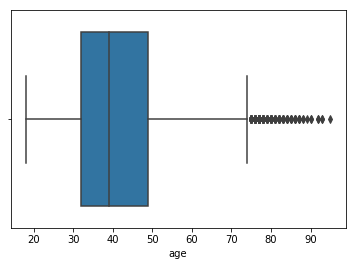

In [49]:
print("Standard Deviation :",bank['age'].std())
print("Minimum :",bank['age'].min())
print("Maximum :",bank['age'].max())
sns.boxplot(x=bank["age"])

Standard Deviation : 347.1283857163069
Minimum : 2
Maximum : 3881


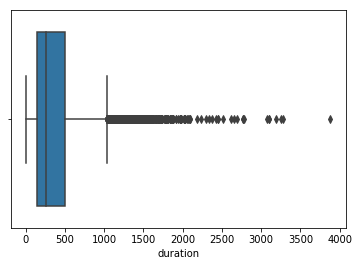

In [50]:
print("Standard Deviation :",bank['duration'].std())
print("Minimum :",bank['duration'].min())
print("Maximum :",bank['duration'].max())
sns.boxplot(x=(bank['duration']))


## Feature Engineering

#### Encode of Binary variables

In [51]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
var  = ['housing','loan','deposit','default']

for i in var:
    bank[i] = label_enc.fit_transform(bank[i])
bank.tail()    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0
11161,34,technician,married,secondary,0,0,0,0,cellular,9,jul,628,1,-1,0,unknown,0


#### By Segregating the age as Adult , Middle Aged and old.  

In [52]:
bank['adult_age'] = 0
bank['middle_age'] = 0
bank['old_age'] = 0

bank.loc[(bank['age'] >= 18) & (bank['age'] <=35),'adult_age'] = 1
bank.loc[(bank['age'] >= 36) & (bank['age'] <=60),'middle_age'] = 1
bank.loc[(bank['age'] >= 61) ,'old_age'] = 1


#### On campaign 

In [53]:
bank.loc[(bank['campaign'] == 1),'campaign'] = 1
bank.loc[(bank['campaign'] >= 2)&(bank['campaign'] <=3),'campaign'] = 2
bank.loc[bank['campaign'] >= 4,'campaign'] =3

#### On Duration

In [54]:
bank['t_min'] =0
bank['t_e_min'] = 0
bank['e_min'] = 0
bank.loc[bank['duration'] <= 5,'t_min'] = 1
bank.loc[(bank['duration'] > 5) & (bank['duration'] <= 10),'t_e_min'] = 1
bank.loc[bank['duration'] > 10,'e_min'] = 1

##### On Pday

In [55]:
bank['pdays_not_contacted'] = 0
bank['months_passed'] = 0

bank.loc[bank['pdays'] == -1 ,'pdays_not_contacted'] = 1
bank['months_passed'] = bank['pdays']/30
bank.loc[(bank['months_passed'] >= 0) & (bank['months_passed'] <=2) ,'months_passed'] = 1
bank.loc[(bank['months_passed'] > 2) & (bank['months_passed'] <=6),'months_passed'] = 2
bank.loc[bank['months_passed'] > 6 ,'months_passed'] = 3


##### On Previous

In [56]:
bank['previous_not_contacted'] = 0
bank['previous_contacted'] = 0
    
bank.loc[bank['previous'] == 0 ,'previous_not_contacted'] = 1
bank.loc[(bank['previous'] >= 1) & (bank['pdays'] <=99) ,'previous_contacted'] = 1
bank.loc[bank['previous'] >= 100,'previous_contacted'] = 2

##### On balance Segregate the Positive and negative 

In [57]:
bank['negative_Balance'] = 0
bank['no_balance'] = 0
bank['positive_Balance'] = 0

bank.loc[~bank['balance']<0,'negative_Balance'] = 1
bank.loc[bank['balance'] == 0,'no_balance'] = 1
bank.loc[(bank['balance'] >= 1) & (bank['balance'] <= 100),'positive_Balance'] = 1
bank.loc[(bank['balance'] >= 101) & (bank['balance'] <= 500),'positive_Balance'] = 2
bank.loc[(bank['balance'] >= 501) & (bank['balance'] <= 2000),'positive_Balance'] = 3
bank.loc[(bank['balance'] >= 2001) & (bank['balance'] <= 10000),'positive_Balance'] = 4
bank.loc[bank['balance'] >= 10001,'positive_Balance'] = 5


##### Encode the data of Education

In [58]:
bank['education'] = bank['education'].replace('unknown',0)
bank['education'] = bank['education'].replace('primary',1)
bank['education'] = bank['education'].replace('secondary',2)
bank['education'] = bank['education'].replace('tertiary',3)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,previous_not_contacted,previous_contacted,negative_Balance,no_balance,positive_Balance
0,59,admin.,married,2,0,2343,1,0,unknown,5,...,0,0,1,1,-0.033333,1,0,1,0,4
1,56,admin.,married,2,0,45,0,0,unknown,5,...,0,0,1,1,-0.033333,1,0,1,0,1
2,41,technician,married,2,0,1270,1,0,unknown,5,...,0,0,1,1,-0.033333,1,0,1,0,3
3,55,services,married,2,0,2476,1,0,unknown,5,...,0,0,1,1,-0.033333,1,0,1,0,4
4,54,admin.,married,3,0,184,0,0,unknown,5,...,0,0,1,1,-0.033333,1,0,1,0,2


#### Encode the data of Marital

In [59]:
marital = pd.get_dummies(bank['marital'],prefix='marital',prefix_sep='_')
bank = pd.concat([bank,marital],axis=1)
marital.head(4)

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0


#### Encode the data of Job

In [60]:
#map each of the title groups to a numerical value
jobs = {
        "management":0,
        "technician": 1,
        "entrepreneur": 2,
        "blue-collar": 3,
        "retired": 4,
        "admin.": 5,
        "services": 6,
        "self-employed": 7,
        "unemployed": 8,
        "student": 9,
        "housemaid": 10,
        "unknown": 11
}

In [61]:
bank['job'] = bank['job'].map(jobs)

#### Encode the data of month

In [62]:
month = {
        'jan':1,
        'feb':2,
        'mar':3,
        'apr':4,
        'may':5,
        'jun':6,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec':12
}
bank['month'] = bank['month'].map(month)

#### Encode the data of Conatct

In [63]:
bank['contact'] = bank['contact'].replace('unknown',0)
bank['contact'] = bank['contact'].replace('cellular',2)
bank['contact'] = bank['contact'].replace('telephone',1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays_not_contacted,months_passed,previous_not_contacted,previous_contacted,negative_Balance,no_balance,positive_Balance,marital_divorced,marital_married,marital_single
0,59,5,married,2,0,2343,1,0,0,5,...,1,-0.033333,1,0,1,0,4,0,1,0
1,56,5,married,2,0,45,0,0,0,5,...,1,-0.033333,1,0,1,0,1,0,1,0
2,41,1,married,2,0,1270,1,0,0,5,...,1,-0.033333,1,0,1,0,3,0,1,0
3,55,6,married,2,0,2476,1,0,0,5,...,1,-0.033333,1,0,1,0,4,0,1,0
4,54,5,married,3,0,184,0,0,0,5,...,1,-0.033333,1,0,1,0,2,0,1,0


In [64]:
bank.drop(['poutcome','age','day','duration','pdays','previous','balance','marital'],axis=1,inplace=True)
bank.head()

,job,education,default,housing,loan,contact,month,campaign,deposit,adult_age,...,pdays_not_contacted,months_passed,previous_not_contacted,previous_contacted,negative_Balance,no_balance,positive_Balance,marital_divorced,marital_married,marital_single
0,5,2,0,1,0,0,5,1,1,0,...,1,-0.033333,1,0,1,0,4,0,1,0
1,5,2,0,0,0,0,5,1,1,0,...,1,-0.033333,1,0,1,0,1,0,1,0
2,1,2,0,1,0,0,5,1,1,0,...,1,-0.033333,1,0,1,0,3,0,1,0
3,6,2,0,1,0,0,5,1,1,0,...,1,-0.033333,1,0,1,0,4,0,1,0
4,5,3,0,0,0,0,5,2,1,0,...,1,-0.033333,1,0,1,0,2,0,1,0


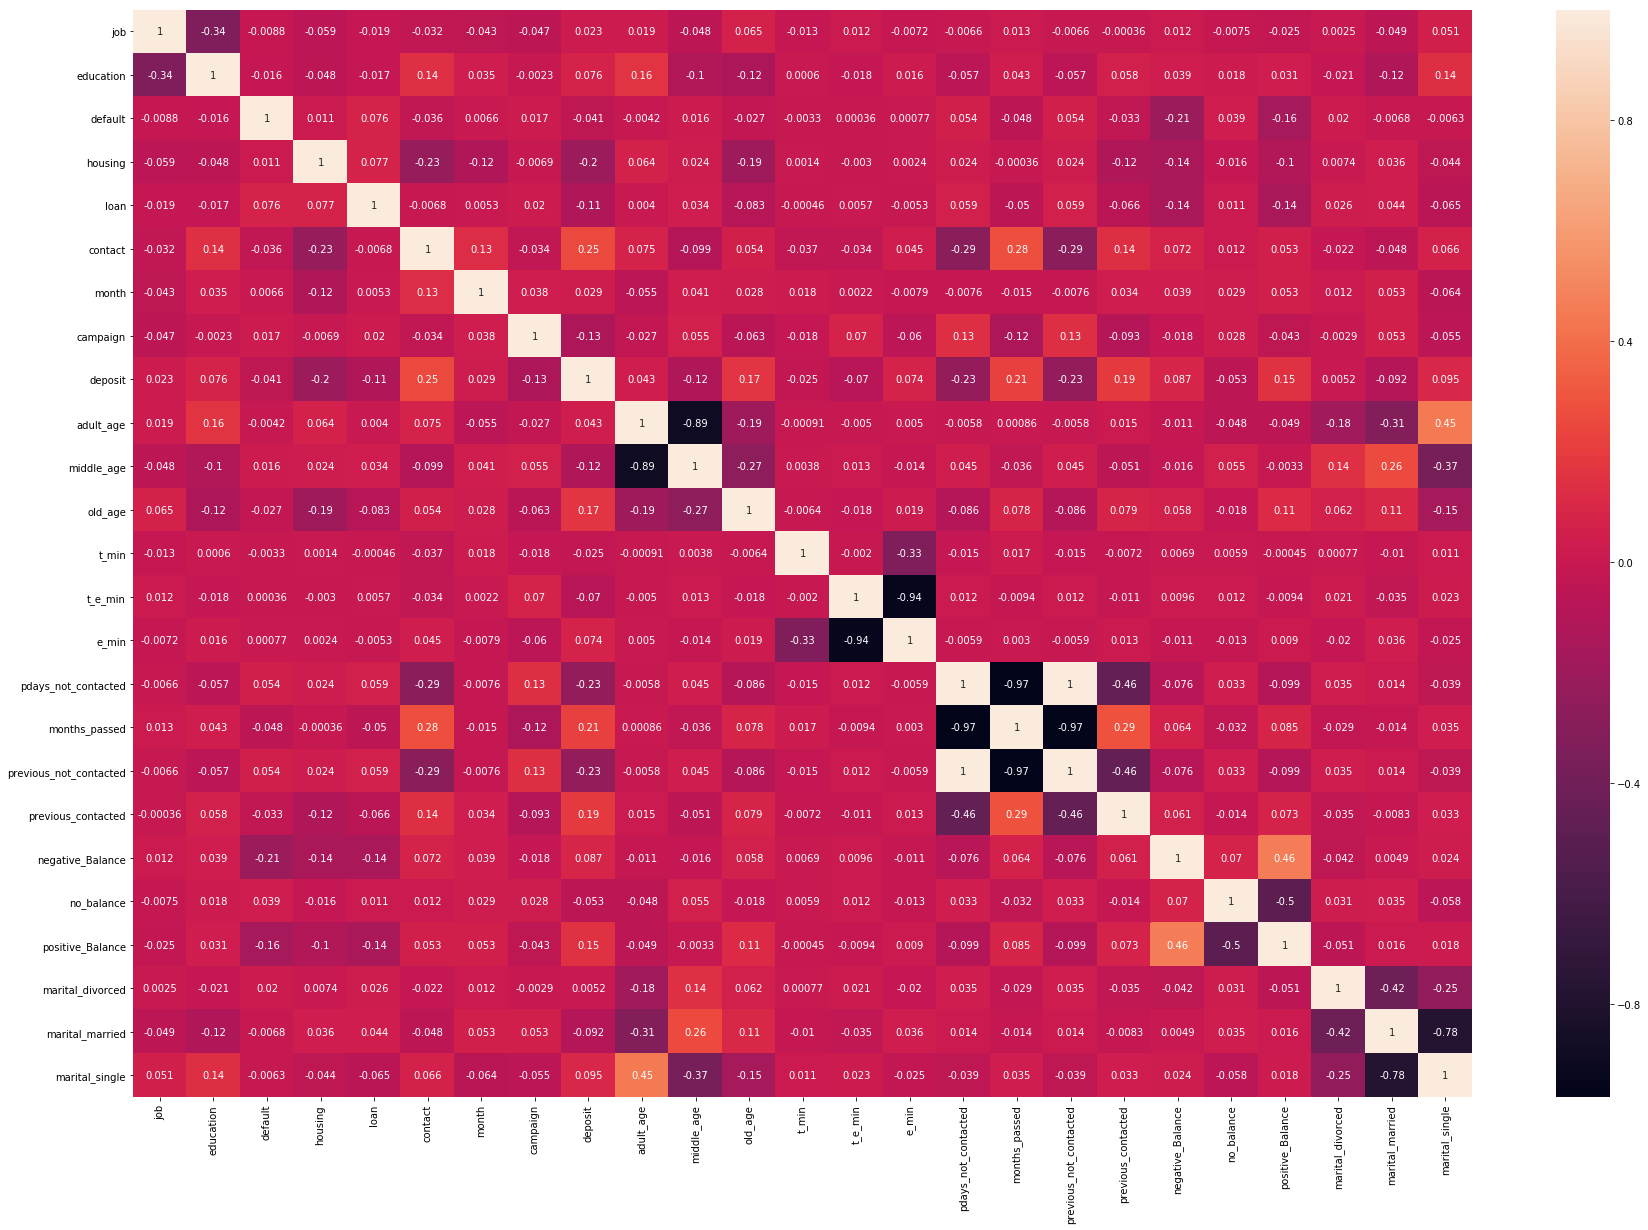

In [65]:
plt.figure(figsize=(30,20))
sns.heatmap(bank.corr(), annot=True)

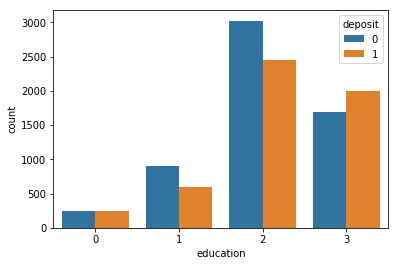

In [66]:
sns.countplot(x='education',hue='deposit',data=bank)

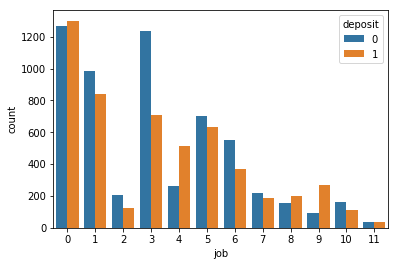

In [67]:
sns.countplot(x='job',hue='deposit',data=bank)

In [68]:
#sns.pairplot(data=bank)

In [69]:
bank.corr()
#bank.columns

,job,education,default,housing,loan,contact,month,campaign,deposit,adult_age,...,pdays_not_contacted,months_passed,previous_not_contacted,previous_contacted,negative_Balance,no_balance,positive_Balance,marital_divorced,marital_married,marital_single
job,1.000000,-0.335248,-0.008751,-0.059231,-0.019027,-0.031754,-0.043495,-0.046929,0.022687,0.019005,...,-0.006600,0.013117,-0.006600,-0.000356,0.011545,-0.007458,-0.025488,0.002497,-0.048990,0.050501
education,-0.335248,1.000000,-0.015728,-0.047730,-0.016820,0.140759,0.034792,-0.002292,0.075583,0.161917,...,-0.056742,0.043417,-0.056742,0.057843,0.038747,0.017812,0.031421,-0.020582,-0.116997,0.138890
default,-0.008751,-0.015728,1.000000,0.011076,0.076434,-0.035709,0.006561,0.016782,-0.040680,-0.004203,...,0.053592,-0.048435,0.053592,-0.033082,-0.206964,0.038670,-0.160221,0.019633,-0.006819,-0.006255
housing,-0.059231,-0.047730,0.011076,1.000000,0.076761,-0.226392,-0.117996,-0.006858,-0.203888,0.063958,...,0.024199,-0.000364,0.024199,-0.117083,-0.136906,-0.015679,-0.100191,0.007430,0.036305,-0.043817
loan,-0.019027,-0.016820,0.076434,0.076761,1.000000,-0.006829,0.005308,0.019744,-0.110580,0.003957,...,0.059318,-0.050088,0.059318,-0.065514,-0.142529,0.011254,-0.136120,0.026463,0.044148,-0.065288
contact,-0.031754,0.140759,-0.035709,-0.226392,-0.006829,1.000000,0.127822,-0.033672,0.249847,0.075210,...,-0.286936,0.276925,-0.286936,0.135538,0.072389,0.012073,0.052612,-0.021823,-0.048158,0.066366
month,-0.043495,0.034792,0.006561,-0.117996,0.005308,0.127822,1.000000,0.037582,0.028645,-0.055156,...,-0.007632,-0.014671,-0.007632,0.033974,0.038703,0.028965,0.053045,0.011889,0.052814,-0.064487
campaign,-0.046929,-0.002292,0.016782,-0.006858,0.019744,-0.033672,0.037582,1.000000,-0.129236,-0.026819,...,0.133772,-0.122512,0.133772,-0.092543,-0.017880,0.028093,-0.042806,-0.002881,0.053139,-0.054658
deposit,0.022687,0.075583,-0.040680,-0.203888,-0.110580,0.249847,0.028645,-0.129236,1.000000,0.043320,...,-0.230850,0.212515,-0.230850,0.185734,0.086544,-0.052797,0.153433,0.005228,-0.092157,0.094632
adult_age,0.019005,0.161917,-0.004203,0.063958,0.003957,0.075210,-0.055156,-0.026819,0.043320,1.000000,...,-0.005753,0.000861,-0.005753,0.014603,-0.011129,-0.047755,-0.048801,-0.176262,-0.309861,0.451711


## Split the Train and Test data

In [70]:
features = bank.drop('deposit',axis=1)
target = bank['deposit']

In [71]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score, recall_score,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [72]:
#scaler = StandardScaler()
#X = scaler.fit_transform(features)
X = features
y = target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7813, 24) (3349, 24)
(7813,) (3349,)


In [73]:
def report_matrix(y_pred,y_test):
    print("Classification Report :\n",classification_report(y_pred,y_test))
    print("Confusion matrix :\n",confusion_matrix(y_pred,y_test))
    print("Precison Score :",precision_score(y_pred,y_test,average='weighted'))
    print("Recall Score :",recall_score(y_pred,y_test,average='weighted'))
    print("F1 score :",f1_score(y_pred,y_test,average='weighted'))
    print("Column Stack :",np.column_stack((y_pred,y_test)))
   # print("ROC Score :",roc_auc_score(y_pred,y_test)*100)
    

#def plot_roc_curve(fpr, tpr, label=None):

    #plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot([0,1], [0,1], 'k--')
    #plt.axis([0, 1, 0, 1])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('ROC Curve')

### Logistic Classifier

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression(random_state=1)
#lr.fit(X_train,y_train)
#y_pred = lr.predict(X_test)

#cv = ShuffleSplit(n_splits=10,random_state=1,test_size=0.3)
cv = KFold(n_splits=10,random_state=1,shuffle=True)
score = cross_val_score(lr,X,y,cv=cv,scoring='accuracy')
predict = cross_val_predict(lr,X,y,cv=6)

avg_accuracy_l = round(score.mean()*100,2)
print("Avg Accuracy : ",avg_accuracy_l)
report_matrix(predict,y)

Avg Accuracy :  67.86
Classification Report :
              precision    recall  f1-score   support

          0       0.72      0.67      0.70      6365
          1       0.60      0.66      0.63      4797

avg / total       0.67      0.67      0.67     11162

Confusion matrix :
 [[4253 2112]
 [1620 3177]]
Precison Score : 0.6710941169389077
Recall Score : 0.6656513169682853
F1 score : 0.6670853117743158
Column Stack : [[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [76]:
#fpr, tpr, thresholds = roc_curve(lr.predict(X_test), y_test)
#plt.figure(figsize=(12,8))
#plot_roc_curve(fpr,tpr)
#plt.show()

### SVC

In [77]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [78]:
svc = svm.SVC(kernel='rbf',random_state=1,C=1.0,gamma=1.0)
#svc.fit(X_train,y_train)

cv = KFold(shuffle=True,n_splits=10,random_state=1)
#cv = ShuffleSplit(n_splits=10,random_state=1,test_size=0.25)
score = cross_val_score(svc,X,y,cv=cv,scoring='accuracy')
predict = cross_val_predict(svc,X,y,cv=6)

#y_pred = svc.predict(X_test)
avg_accuracy_svc = score.mean()*100
print("Avg Accuracy : ",avg_accuracy_svc)
#print("Accuracy : ",accuracy_score(y_pred,y_test))
report_matrix(predict,y)

Avg Accuracy :  66.18870791257946
Classification Report :
              precision    recall  f1-score   support

          0       0.69      0.62      0.65      6544
          1       0.53      0.60      0.56      4618

avg / total       0.62      0.61      0.62     11162

Confusion matrix :
 [[4047 2497]
 [1826 2792]]
Precison Score : 0.6223941564144386
Recall Score : 0.6127038165203369
F1 score : 0.6153550661400212
Column Stack : [[0 1]
 [0 1]
 [0 1]
 ...
 [0 0]
 [1 0]
 [0 0]]


##### Using Grid Search CV

In [79]:
params = {'C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

svm_grid_rbf = GridSearchCV(svc, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') # Grid Search cross vlaidation
svm_grid_rbf.fit(X_train, y_train)
y_pred = svm_grid_rbf.predict(X_test)
accuracy_grid_svc = svm_grid_rbf.best_score_*100

accuracy_grid_svc = accuracy_score(y_pred,y_test)*100
print("Accurcy : ",accuracy_grid_svc)
best = svm_grid_rbf.best_estimator_.get_params() 
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))


report_matrix(y_pred,y_test)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  3.7min finished


Accurcy :  69.36398925052254
	C: 	 1.00
	gamma: 	 0.10
Classification Report :
              precision    recall  f1-score   support

          0       0.79      0.68      0.73      2032
          1       0.59      0.71      0.65      1317

avg / total       0.71      0.69      0.70      3349

Confusion matrix :
 [[1383  649]
 [ 377  940]]
Precison Score : 0.7094147904756107
Recall Score : 0.6936398925052254
F1 score : 0.6969898624053349
Column Stack : [[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


### Decision Tree

In [80]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import export_graphviz

In [81]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_dt_1 = accuracy_score(y_pred,y_test)*100
print("Accurcy : ",accuracy_dt_1)
report_matrix(y_pred,y_test)

Accurcy :  62.317109584950735
Classification Report :
              precision    recall  f1-score   support

          0       0.67      0.63      0.65      1868
          1       0.57      0.61      0.59      1481

avg / total       0.63      0.62      0.62      3349

Confusion matrix :
 [[1183  685]
 [ 577  904]]
Precison Score : 0.6265006763821914
Recall Score : 0.6231710958495074
F1 score : 0.6241905472158135
Column Stack : [[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [82]:
dot -Tpng tree.dot -o tree2.png

SyntaxError: invalid syntax (<ipython-input-82-c24861126349>, line 1)

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
dot_data = tree.export_graphviz(dt, out_file=dt,
                                feature_names=X_train[:],
                                class_names=y_train,
                                rounded=True,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

##### Using Grid Search

In [83]:
params = {'max_leaf_nodes': list(range(2, 50)),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': list(range(5, 20))}

grid_search_cv = GridSearchCV(dt, params, n_jobs=-1, verbose=1,scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

y_pred = grid_search_cv.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)*100
print("Accuracy : ",accuracy_dt)
report_matrix(y_pred,y_test)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 4550 tasks      | elapsed:   50.3s


Accuracy :  68.13974320692743
Classification Report :
              precision    recall  f1-score   support

          0       0.81      0.66      0.73      2159
          1       0.54      0.72      0.62      1190

avg / total       0.71      0.68      0.69      3349

Confusion matrix :
 [[1426  733]
 [ 334  856]]
Precison Score : 0.713746775318199
Recall Score : 0.6813974320692744
F1 score : 0.6880506724232619
Column Stack : [[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  1.2min finished


### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_clf = RandomForestClassifier(random_state=1)
#rf_clf.fit(X_train, y_train)

cv = KFold(n_splits=10,shuffle=True,random_state=1)
#cv = ShuffleSplit(n_splits=10,random_state=1,test_size=0.3)
score = cross_val_score(rf_clf,X,y,cv=cv,scoring='accuracy')
predict = cross_val_predict(rf_clf,X,y,cv=6)
#y_pred = rf_clf.predict(X_test)
avg_score_rf = score.mean()*100

print("Avg Accuracy :",avg_score_rf)

report_matrix(predict,y)

Avg Accuracy : 65.67821995039196
Classification Report :
              precision    recall  f1-score   support

          0       0.72      0.61      0.66      6989
          1       0.48      0.61      0.54      4173

avg / total       0.63      0.61      0.62     11162

Confusion matrix :
 [[4255 2734]
 [1618 2555]]
Precison Score : 0.6342437771559519
Recall Score : 0.6101057158215374
F1 score : 0.6161838255412136
Column Stack : [[0 1]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### K-nearest

In [86]:
from sklearn.neighbors import KNeighborsClassifier

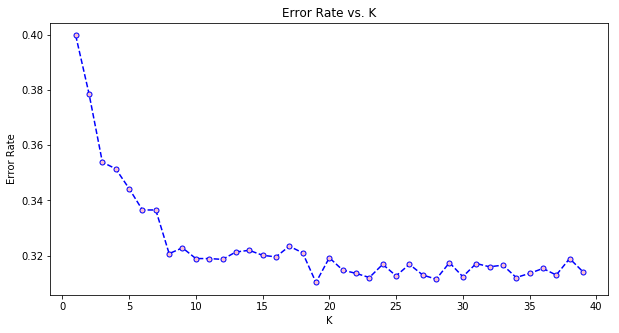

In [87]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,5))
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K')
plt.plot(range(1,40),error_rate,color='blue',marker='o',markerfacecolor='pink',markersize=5,ls='--')


In [88]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_pred,y_test)*100
print("Accuracy :",accuracy_knn)
report_matrix(y_pred,y_test)

Accuracy : 68.9758136757241
Classification Report :
              precision    recall  f1-score   support

          0       0.78      0.68      0.73      2019
          1       0.59      0.71      0.64      1330

avg / total       0.70      0.69      0.69      3349

Confusion matrix :
 [[1370  649]
 [ 390  940]]
Precison Score : 0.7042078517511549
Recall Score : 0.689758136757241
F1 score : 0.6928903955191812
Column Stack : [[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


### Extra Tree

In [89]:
from sklearn.ensemble import ExtraTreesClassifier

In [90]:
xt_clf = ExtraTreesClassifier(random_state=1)
xt_clf.fit(X_train, y_train)
y_pred = xt_clf.predict(X_test)
accuracy_extra = accuracy_score(y_pred,y_test)*100
print("Accuracy :",accuracy_extra)

Accuracy : 64.22812779934308


In [91]:
report_matrix(y_pred,y_test)

Classification Report :
              precision    recall  f1-score   support

          0       0.72      0.64      0.68      1986
          1       0.55      0.64      0.59      1363

avg / total       0.65      0.64      0.65      3349

Confusion matrix :
 [[1274  712]
 [ 486  877]]
Precison Score : 0.6538845586678591
Recall Score : 0.6422812779934308
F1 score : 0.6451836728131152
Column Stack : [[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


### Ada Boost

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())
#ada_clf.fit(X_train, y_train)
cv = KFold(n_splits=10,shuffle=True,random_state=1)
#cv = ShuffleSplit(n_splits=10,random_state=1,test_size=0.25)
score = cross_val_score(ada_clf,X,y,scoring='accuracy',cv=cv)
predict = cross_val_predict(ada_clf,X,y,cv=6)

avg_ada = score.mean()*100
print("Avg Accuracy :",avg_ada)

#y_pred = ada_clf.predict(X_test)
#print("Accuracy :",accuracy_score(y_pred,y_test)*100)
report_matrix(predict,y)

Avg Accuracy : 64.26260175906407
Classification Report :
              precision    recall  f1-score   support

          0       0.69      0.61      0.65      6643
          1       0.51      0.59      0.55      4519

avg / total       0.61      0.60      0.61     11162

Confusion matrix :
 [[4038 2605]
 [1835 2684]]
Precison Score : 0.6146448088972969
Recall Score : 0.6022218240458699
F1 score : 0.6056001716262709
Column Stack : [[0 1]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Gradient Boost

In [94]:
from sklearn.ensemble import GradientBoostingClassifier 

In [95]:
gbc = GradientBoostingClassifier()
#gbc.fit(X_train,y_train)
#y_pred = gbc.predict(X_test)

cv = KFold(n_splits=10,shuffle=True,random_state=1)
#cv = ShuffleSplit(n_splits=10,random_state=1,test_size=0.25)
score = cross_val_score(gbc,X,y,cv=cv,scoring='accuracy')
predict = cross_val_predict(gbc,X,y,cv=6)

avg_accuracy_gbc = score.mean()*100
print("Avg Accuracy :",avg_accuracy_gbc)
#print("Accuracy :",accuracy_score(y_pred,y_test)*100)
report_matrix(predict,y)

Avg Accuracy : 71.80608099652488
Classification Report :
              precision    recall  f1-score   support

          0       0.80      0.65      0.72      7268
          1       0.52      0.70      0.59      3894

avg / total       0.70      0.67      0.67     11162

Confusion matrix :
 [[4706 2562]
 [1167 2727]]
Precison Score : 0.7016256428799537
Recall Score : 0.6659200860060921
F1 score : 0.673562971752906
Column Stack : [[0 1]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### XGB 

In [96]:
import xgboost as xgb

In [97]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=1000, learning_rate=0.2,
                            n_jobs=-1,random_state=1)
#xgb_clf.fit(X_train, y_train)
#y_pred = xgb_clf.predict(X_test)
cv = KFold(n_splits=10,shuffle=True,random_state=1)
#cv = ShuffleSplit(n_splits=10,random_state=1,test_size=0.25)
score = cross_val_score(xgb_clf,X,y,cv=cv,scoring='accuracy')
predict = cross_val_predict(xgb_clf,X,y,cv=6)

avg_xgb = score.mean()*100
print("Avg Accuracy :",avg_xgb)
report_matrix(predict,y)

Avg Accuracy : 71.4835805713589
Classification Report :
              precision    recall  f1-score   support

          0       0.79      0.64      0.71      7267
          1       0.51      0.69      0.59      3895

avg / total       0.69      0.66      0.67     11162

Confusion matrix :
 [[4665 2602]
 [1208 2687]]
Precison Score : 0.6944159391247456
Recall Score : 0.6586633219853073
F1 score : 0.6664624271813566
Column Stack : [[0 1]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Bagging classifier

In [98]:
from sklearn.ensemble import BaggingClassifier

In [99]:
bg = BaggingClassifier(base_estimator=dt,n_estimators=100,oob_score=True,random_state=1)
bg.fit(X_train,y_train)
y_pred = bg.predict(X_test)
accuracy_bg = accuracy_score(y_pred,y_test)*100
print("Accuracy : ",accuracy_bg)
report_matrix(y_pred,y_test)

Accuracy :  66.31830397133473
Classification Report :
              precision    recall  f1-score   support

          0       0.71      0.67      0.69      1870
          1       0.61      0.66      0.63      1479

avg / total       0.67      0.66      0.66      3349

Confusion matrix :
 [[1251  619]
 [ 509  970]]
Precison Score : 0.666479053326646
Recall Score : 0.6631830397133472
F1 score : 0.6641178661311157
Column Stack : [[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


### Accuracies

In [100]:
dic = {
        'Model' : ['Logistic','SVC','SVC Grid','Decision Tree','Decision Tree Grid Serch','Random Forest','KNN','Extra Tree'
                       ,'Adaboost','GBM','XGBM','Bagging'],
        'Accuracy' : [avg_accuracy_l,avg_accuracy_svc,accuracy_grid_svc,accuracy_dt_1,accuracy_dt,avg_score_rf,
                         accuracy_knn,accuracy_extra,
                         avg_ada,avg_accuracy_gbc,
                         avg_xgb,accuracy_bg]}
acc = pd.DataFrame(dic)
acc

,Model,Accuracy
0,Logistic,67.860000
1,SVC,66.188708
2,SVC Grid,69.363989
3,Decision Tree,62.317110
4,Decision Tree Grid Serch,68.139743
5,Random Forest,65.678220
6,KNN,68.975814
7,Extra Tree,64.228128
8,Adaboost,64.262602
9,GBM,71.806081


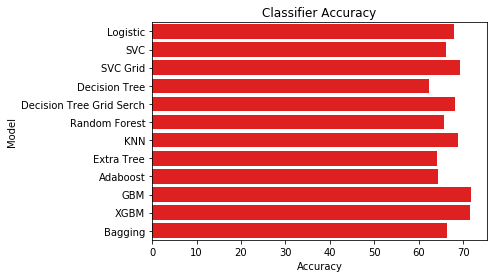

In [101]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
#sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=acc, color="r")  
plt.show()